In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [405]:
import warnings
warnings.filterwarnings('ignore')

In [406]:
data=pd.read_excel('data.xls', index_col=None,na_values=['NA'])
data.head()
data['Unnamed: 5'] = data['Unnamed: 5'].convert_objects(convert_numeric=True)
data['Unnamed: 6'] = data['Unnamed: 6'].convert_objects(convert_numeric=True)

In [407]:
# data.apply(lambda x:sum(x.isnull()),axis=0)

In [408]:
# data.fillna(0)
data=data.drop(data.index[0])
data=data.drop(data.index[-1])
data.head(1)


,PROGRAM,Unnamed: 1,Unnamed: 2,Unnamed: 3,FUNDING,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN


In [409]:
#removing columns where NaN values are more than 40%
pct_null = data.isnull().sum() / len(data)       #calculating % of NaN values
missing_features = pct_null[pct_null > 0.40].index    #columns with missing values more than 40%
# print(missing_features)                                 
data.drop(missing_features, axis=1, inplace=True)       #droping columns with mising values more than 40%
data.head()


,PROGRAM,Unnamed: 1,Unnamed: 2,Unnamed: 3,FUNDING,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Primary Objective,Unnamed: 43,Unnamed: 46,Audience or Beneficiary,Underrepresented or Underserved,Citizens,Minority Serving Institutions,Legistative Action to Change Program?,Outputs,Outputs.1
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,Institutional Capacity: Support advancement an...,Engagement in authentic STEM experience (inclu...,Training or professional development,NaN,No,No,No,Don't know,NaN,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,NaN,NaN
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.00,5.00,4.37,General STEM,Institutional Capacity: Support advancement an...,Engagement in authentic STEM experience (inclu...,NaN,NaN,No,No,No,Don't know,NaN,NaN
PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.57,11.79,4.18,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,Number of learners (any age) served,Number of learners (any age) served
PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.63,2.74,2.02,General STEM,"Learning: Develop STEM skills, practices, or k...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,No,No,No,Don't know,NaN,NaN


In [410]:
data["difference_of_2009_and_2008"]=data['Unnamed: 6']-data['Unnamed: 5']
# data.head(3)

In [411]:
data["growth"]=(data['difference_of_2009_and_2008']/data['Unnamed: 6'])*100.00
# data.head()

In [412]:
data['Target'] = data.apply(lambda _: '', axis=1)

In [413]:
data['Target'] = np.where(data['growth'].isnull(), np.nan, np.where(data['growth'] > 0,   1, 0))
# data

In [414]:
# STAGE 2

#univariate distribution

data['Unnamed: 2']=data['Unnamed: 2'].fillna(data['Unnamed: 2'].mode()[0])
data['FUNDING']=data['FUNDING'].fillna(data['FUNDING'].mode()[0])
data['Unnamed: 5']=data['Unnamed: 5'].fillna(data['Unnamed: 5'].mode()[0])
data['Unnamed: 6']=data['Unnamed: 6'].fillna(data['Unnamed: 6'].mode()[0])
data['Unnamed: 43']=data['Unnamed: 43'].fillna(data['Unnamed: 43'].mode()[0])
data['Unnamed: 46']=data['Unnamed: 46'].fillna(data['Unnamed: 46'].mode()[0])
data['Audience or Beneficiary']=data['Audience or Beneficiary'].fillna(data['Audience or Beneficiary'].mode()[0])
data['Minority Serving Institutions']=data['Minority Serving Institutions'].fillna(data['Minority Serving Institutions'].mode()[0])
data['Outputs']=data['Outputs'].fillna(data['Outputs'].mode()[0])
data['Outputs.1']=data['Outputs.1'].fillna(data['Outputs.1'].mode()[0])
data['difference_of_2009_and_2008']=data['difference_of_2009_and_2008'].fillna(data['difference_of_2009_and_2008'].mode()[0])
data['growth']=data['growth'].fillna(data['growth'].mode()[0])
data['Target']=data['Target'].fillna(data['Target'].mode()[0])
data['Legistative Action to Change Program?']=data['Legistative Action to Change Program?'].fillna(data['Legistative Action to Change Program?'].mode()[0])
# a=data['Unnamed: 2'].value_counts().sort_index().plot.bar()
# data.apply(lambda x:sum(x.isnull()),axis=0)
# data

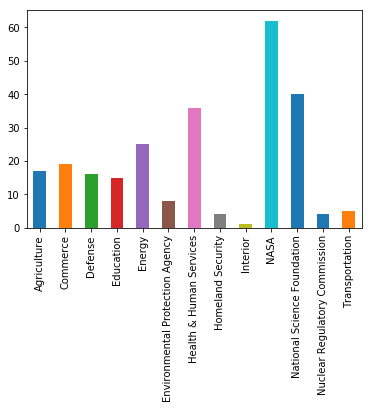

In [415]:
a=data['Unnamed: 1'].value_counts().sort_index().plot.bar()

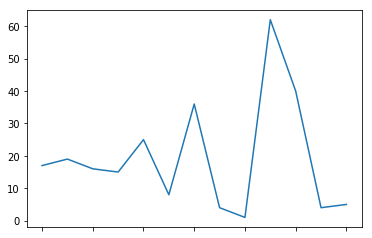

In [416]:
a=data['Unnamed: 1'].value_counts().sort_index().plot.line()

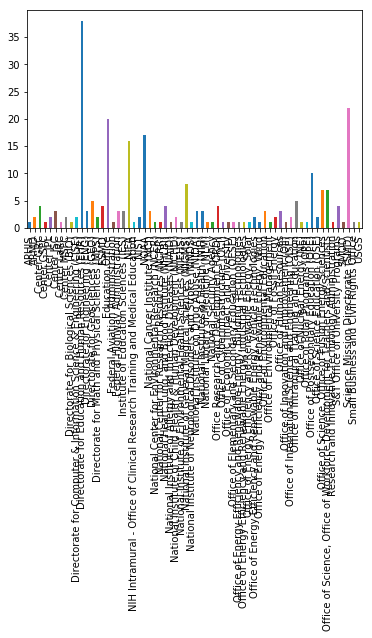

In [417]:
a=data['Unnamed: 2'].value_counts().sort_index().plot.bar()

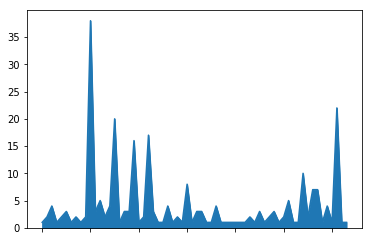

In [418]:
a=data['Unnamed: 2'].value_counts().sort_index().plot.area()

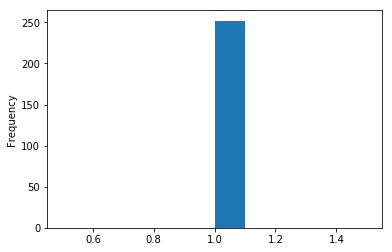

In [419]:
a=data['Unnamed: 3'].value_counts().sort_index().plot.hist()

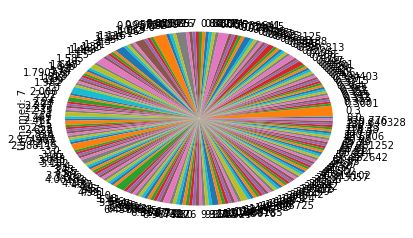

In [420]:
a=data['Unnamed: 7'].value_counts().sort_index().plot.pie()

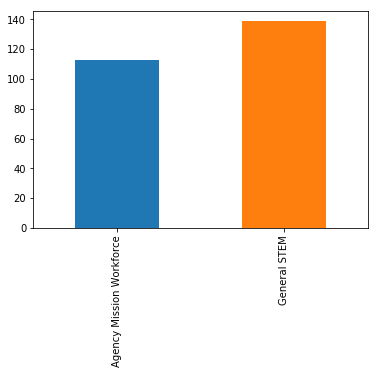

In [421]:
a=data['Unnamed: 8'].value_counts().sort_index().plot.bar()

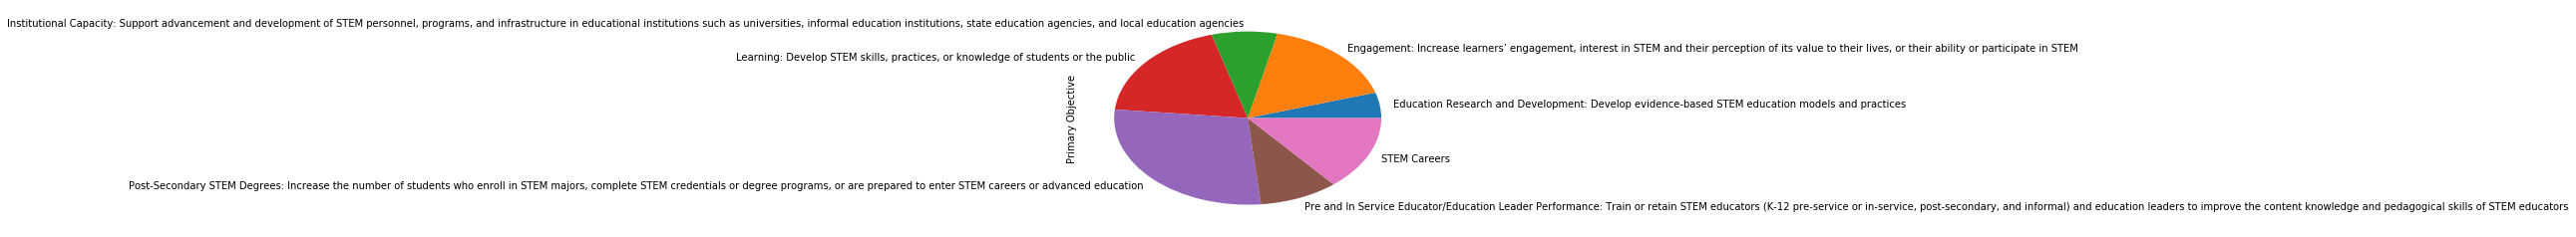

In [422]:
a=data['Primary Objective'].value_counts().sort_index().plot.pie()

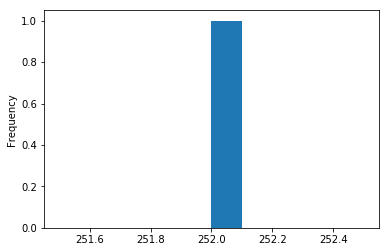

In [423]:
a=data['Unnamed: 43'].value_counts().sort_index().plot.hist()


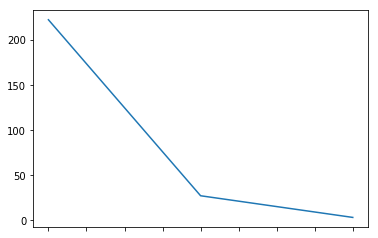

In [424]:
a=data['Minority Serving Institutions'].value_counts().sort_index().plot.line()

In [425]:
# Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables
data.apply(lambda x:sum(x.isnull()),axis=0)

PROGRAM                                  0
Unnamed: 1                               0
Unnamed: 2                               0
Unnamed: 3                               0
FUNDING                                  0
Unnamed: 5                               0
Unnamed: 6                               0
Unnamed: 7                               0
Unnamed: 8                               0
Primary Objective                        0
Unnamed: 43                              0
Unnamed: 46                              0
Audience or Beneficiary                  0
Underrepresented or Underserved          0
Citizens                                 0
Minority Serving Institutions            0
Legistative Action to Change Program?    0
Outputs                                  0
Outputs.1                                0
difference_of_2009_and_2008              0
growth                                   0
Target                                   0
dtype: int64

In [426]:
# Mutual_Info_Score


lst=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 7','Unnamed: 8','Primary Objective','Unnamed: 43','Unnamed: 46','Audience or Beneficiary','Underrepresented or Underserved','Legistative Action to Change Program?','Outputs','Outputs.1']
from sklearn.metrics import mutual_info_score
for i in lst:
    mi=mutual_info_score(data[i], data['Target'])
    print(mi)

0.04235695929023835
0.18739185614931747
0.6337280824752447
0.5405539649964229
0.0007107572009155128
0.0042706616901877215
2.7755575615628914e-16
2.7755575615628914e-16
0.00023170926754118026
0.0015286090718672762
0.017940501027007352
3.4244344526937476e-05
2.7755575615628914e-16


In [427]:
print(data.dtypes)

PROGRAM                                   object
Unnamed: 1                                object
Unnamed: 2                                object
Unnamed: 3                                object
FUNDING                                   object
Unnamed: 5                               float64
Unnamed: 6                               float64
Unnamed: 7                                object
Unnamed: 8                                object
Primary Objective                         object
Unnamed: 43                               object
Unnamed: 46                               object
Audience or Beneficiary                   object
Underrepresented or Underserved           object
Citizens                                  object
Minority Serving Institutions             object
Legistative Action to Change Program?     object
Outputs                                   object
Outputs.1                                 object
difference_of_2009_and_2008              float64
growth              

In [428]:
data['FUNDING'] = data['FUNDING'].astype(int)
cols=['PROGRAM','Unnamed: 1','Unnamed: 2','Unnamed: 3','FUNDING','Unnamed: 7','Unnamed: 8','Primary Objective','Unnamed: 43','Unnamed: 46','Audience or Beneficiary','Underrepresented or Underserved','Citizens','Minority Serving Institutions','Legistative Action to Change Program?','Outputs','Outputs.1']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def encoder(cols=''):
    assert type(cols) == str               #testing parameter
    return le.fit_transform(data[cols])

data_1 = data.copy()
for i in cols:
    data[i] = encoder(i)
# print(data)
# data_1


In [429]:
#  Divide data into train & test samples. (70-30 split)
from sklearn.model_selection import train_test_split
y=data['Target']   #defining the target variable
data=data.drop(['Target'],1)
data=data.drop(['difference_of_2009_and_2008'],1)
# data=data.drop(['growth'],1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(X_test)

(176, 20) (176,)
(76, 20) (76,)
          PROGRAM  Unnamed: 1  Unnamed: 2  Unnamed: 3  FUNDING  Unnamed: 5  \
PRG_0074       88           9          61          23       34    0.350000   
PRG_0226       97           6          30         119       29   16.443000   
PRG_0134       20           2          10          93       36    4.500000   
PRG_0324       27          10          37          79       34    9.900000   
PRG_0287       46           0          19          13       36    0.000000   
PRG_0193      245           3          54         192       19   31.186306   
PRG_0069      138           9           7          45       31    1.400000   
PRG_0130      158           2          10          63       33   19.000000   
PRG_0208        6           0          19         178       27    0.983000   
PRG_0080       84           9          61          50       37    0.000000   
PRG_0317       93           7          59         202       36    0.177000   
PRG_0249      179           6   

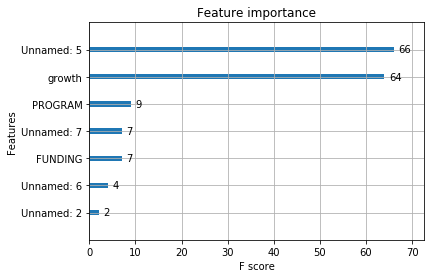

roc_auc_score  *****************************


1.0

In [430]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
model=XGBClassifier()
model.fit(X_train,y_train)
plot_importance(model)
pyplot.show()
print("roc_auc_score  *****************************")
roc_auc_score(y_test, model.predict(X_test))

